# 1. Your views about the problem statement? 


* The problem statement is well-defined. The main aim is to develop a machine learning model that can predict the salary of newly hired employees based on given data. so that the TechWorks Consulting company can give the proper salary based upon the work of an employee.

# 2. What will be your approach to solving this task?



My approach for solving the task of predicting employee salaries based on the given data would be as follows:





**Data collection:** I will import the data provided by internshala team as it will be used for further processing.

**Data Preprocessing:** Cleaning the data by handling missing values, outliers and any inconsistencies. This may involve techniques such as imputation, outlier detection, and normalization.

**Splitting Data:** Divide the dataset into training and testing sets to evaluate the model's performance.

**Model Selection:** Choose appropriate machine learning models based on the nature and complexity of the data . As this is a regression task, models like linear regression, decision trees, random forests could be considered. 

**Model Training:** i will Train the selected models using the training data. Utilize techniques like hyperparameter tuning to optimize model performance.

**Model Evaluation:** Evaluate the trained models using appropriate evaluation metrics such as Mean Squared Error (MSE) on the testing dataset. Compare the performance of different models to select the best one.

**Deployment:** Once a best model is selected, deploy it into a production environment where it can be used to predict salaries for newly hired employees.n.

# 3. What were the available ML model options you had to perform this task?

To perdorm this task there are several machine learning models that could be considered, depending on the nature of the data and the specific requirements of the task. 
Here are some of the available ML model options:




**Linear Regression:** A simple butthe powerful model that assumes a linear relationship between the features and the target variable (salary). It is easy to implement.

**Random Forest:** It is an ensemble learning method that combines multiple decision trees to improve predictive performance. It's robust to overfitting and it can handle large datasets with high dimensionality.

**Decision Trees:** These models partition the feature space into hierarchical structures and are capable of capturing non-linear relationships in the data. They're easy to understand and interpret.

**Lasso Regression :** This is a regression analysis technique that combines the ordinary least squares (OLS) method with L1 regularization

**Ridge Regression:** It is a modification of linear regression that helps prevent overfitting by adding a penalty term to the model..


In [240]:
#first we will import the libraries.

In [241]:
import pandas as pd

In [242]:
import numpy as np

In [243]:
import seaborn as sns

#### Here we will imported the data by using *pd.read_csv* 
#### and taken the overview of the data by using *.head()*

In [244]:
colleges = pd.read_csv("C:/Users/Shubham Naik/Desktop/pgc_python_work/Colleges.csv")

In [245]:
colleges.head() 

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [246]:
cities = pd.read_csv("C:/Users/Shubham Naik/Desktop/pgc_python_work/cities.csv")

In [247]:
cities.head() 

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

In [248]:
df = pd.read_csv("C:/Users/Shubham Naik/Desktop/pgc_python_work/ML case Study.csv")

In [249]:
df.head(5)

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [250]:
# Here we will create a seeperate list of colleges according to theirr tier.

In [251]:
Tier_1 = colleges["Tier 1"].tolist()

In [252]:
Tier_2 = colleges["Tier 2"].tolist()

In [253]:
Tier_3 = colleges["Tier 3"].tolist()

In [254]:
for clg in df.College:
    if clg in Tier_1:
        df["College"].replace(clg,1,inplace=True)
    elif clg in Tier_2:
        df["College"].replace(clg,2,inplace=True)
    elif clg in Tier_3:
        df["College"].replace(clg,3,inplace=True)

In [255]:
# here we have given numbers instead of categorical data based on the college tiers. tier_1 has got 1 , tier_2 has got 2 and tier_3 has got 3

In [256]:
df.head(10) #overview of the data by using .head()

College             City       Role  Previous CTC  Previous job change  \
0        2          Asansol    Manager       55523.0                    3   
1        2            Ajmer  Executive       57081.0                    1   
2        3  Rajpur Sonarpur  Executive       60347.0                    2   
3        3            Ajmer  Executive       49010.0                    2   
4        1         Durgapur  Executive       57879.0                    4   
5        2         Kolhapur  Executive       54340.0                    4   
6        3            Surat  Executive       60298.0                    1   
7        2            Delhi  Executive       49944.0                    2   
8        3          Chennai  Executive       53124.0                    4   
9        1         Kolhapur  Executive       51141.0                    1   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  
5                73           31  59950.89  
6                42           46  66602.34  
7                56           37  57768.44  
8                40           37  70083.30  
9                47           60  85648.48

In [257]:
# now we will be using df.describe which provides summary statistics of a DataFrame's numerical columns.

In [258]:
df.describe()

College  Previous CTC  Previous job change  Graduation Marks  \
count  1589.000000   1589.000000          1589.000000       1589.000000   
mean      1.975456  55518.453744             2.528634         59.855255   
std       0.838330   6655.218445             1.123918         14.935139   
min       1.000000  36990.000000             1.000000         35.000000   
25%       1.000000  50518.000000             2.000000         46.000000   
50%       2.000000  55291.000000             3.000000         60.000000   
75%       3.000000  60109.000000             4.000000         73.000000   
max       3.000000  77911.000000             4.000000         85.000000   

       EXP (Month)            CTC  
count  1589.000000    1589.000000  
mean     39.044682   75353.278798  
std      14.108875   12587.288237  
min      18.000000   53020.320000  
25%      26.000000   66902.350000  
50%      39.000000   73028.670000  
75%      51.000000   80588.670000  
max      64.000000  123416.990000

In [259]:
# Now df.info() will be used to get the summary of a DataFrame, including its size, data types, memory usage, and non-null values.

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 99.4+ KB


In [261]:
#As i was getting the error while doing fit of the linear regression beacuse of city names so here we will convert string type of data to numeric data

In [262]:
metro_city = cities['Metrio City'].tolist()

In [263]:
non_metro_city = cities['non-metro cities'].tolist()

In [264]:
# now we will give the values 1,2 to the city which are metro and non-metro

In [265]:
for city in df.City:
    if city in metro_city:
        df['City'].replace(city,1,inplace=True)
    elif city in non_metro_city:
        df['City'].replace(city,2,inplace=True)

In [266]:
df.head(10) #overview of the data by using .head() and we have entered the value as 10 so it will show 10 rows in output

College  City       Role  Previous CTC  Previous job change  \
0        2     2    Manager       55523.0                    3   
1        2     2  Executive       57081.0                    1   
2        3     2  Executive       60347.0                    2   
3        3     2  Executive       49010.0                    2   
4        1     2  Executive       57879.0                    4   
5        2     2  Executive       54340.0                    4   
6        3     1  Executive       60298.0                    1   
7        2     1  Executive       49944.0                    2   
8        3     1  Executive       53124.0                    4   
9        1     2  Executive       51141.0                    1   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  
5                73           31  59950.89  
6                42           46  66602.34  
7                56           37  57768.44  
8                40           37  70083.30  
9                47           60  85648.48

In [267]:
# here we have created the dummy variable of 'role' and assigned it a numeeric value as it was mentioned in the task.

In [268]:
df = pd.get_dummies(df,columns=["Role"],drop_first=True).astype(int)

In [269]:
df.head() #overview of the data by using .head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)    CTC  Role_Manager  
0           19  71406             1  
1           18  68005             0  
2           28  76764             0  
3           33  82092             0  
4           32  73878             0

### Now we will be doing data preprocessing in which we have to clean the data by handling the missing values and outliers.

* The jointplot and boxplot are the best methods for detection of the outliers ad hence we have used them.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


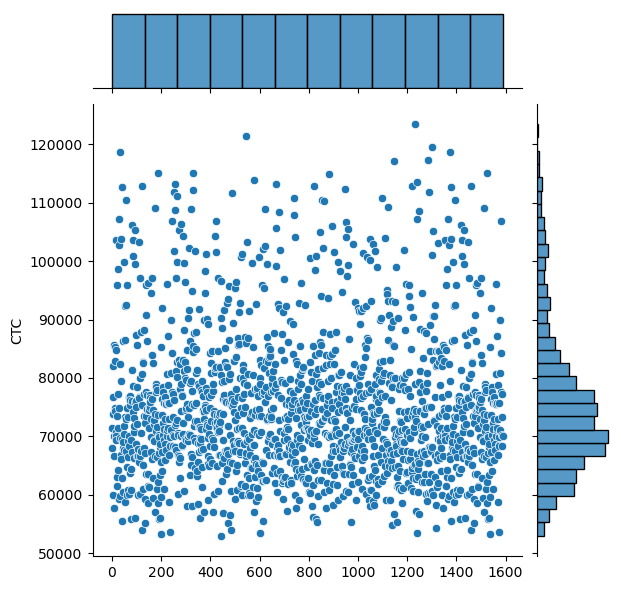

In [270]:
sns.jointplot(df['CTC']) # creating a jointpolt on CTC column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


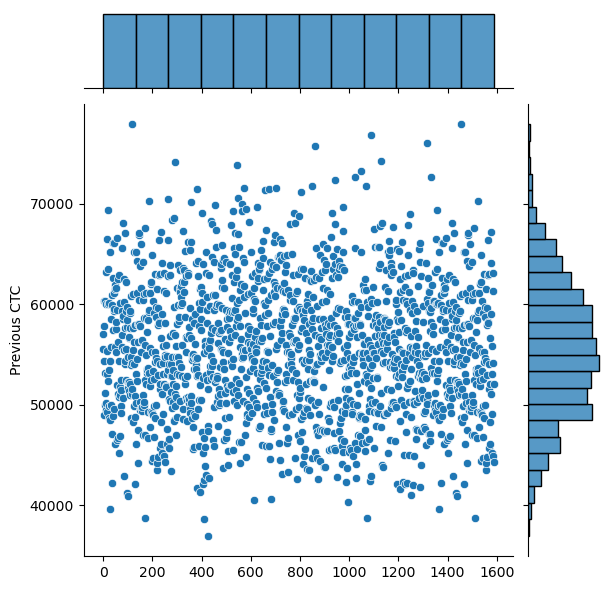

In [271]:
sns.jointplot(df['Previous CTC']) # creating a jointpolt on Previous CTC column.

<Axes: >

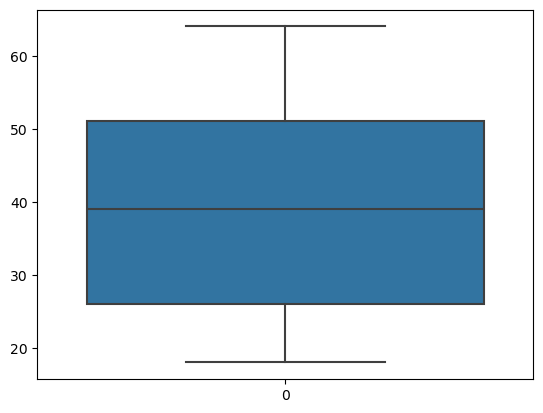

In [272]:
sns.boxplot(df['EXP (Month)']) # creating a Boxplot on EXP (Month) column.

<Axes: >

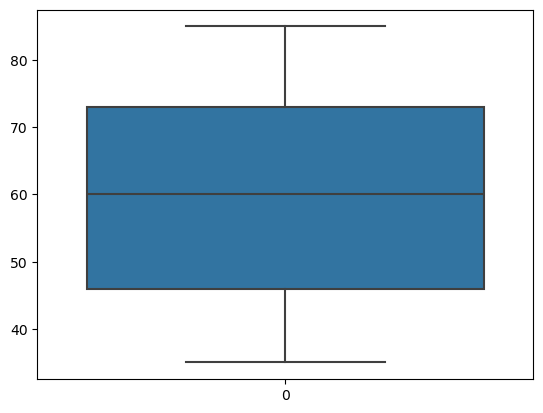

In [273]:
sns.boxplot(df['Graduation Marks'])  # creating a Boxplot on Graduation Marks column.

#### As we have plotted the graphs and there are no such huge outliers that can significanty impact our model hence we not removed the  outliers.

* now we will apply 5 machine learning algorithms

* firstly we will be importing the necessary libraries 

In [274]:
from sklearn.linear_model import LinearRegression

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [277]:
# now we will be splitting the data into x and y  (independent variable , dependent variable )

In [278]:
X = df.loc[:, df.columns != 'CTC']
type(X)

pandas.core.frame.DataFrame

In [279]:
X.head() #overview of the data by using .head()

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     2         55523                    3                66   
1        2     2         57081                    1                84   
2        3     2         60347                    2                52   
3        3     2         49010                    2                81   
4        1     2         57879                    4                74   

   EXP (Month)  Role_Manager  
0           19             1  
1           18             0  
2           28             0  
3           33             0  
4           32             0

In [280]:
Y = df['CTC']

In [281]:
type(Y)

pandas.core.series.Series

In [282]:
Y.head() #overview of the data by using .head()

0    71406
1    68005
2    76764
3    82092
4    73878
Name: CTC, dtype: int32

### Linear regresion

In [283]:
# test-train split so here the test will be 20% of the data anf train will be 80% of the data.

In [284]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [285]:
Lr = LinearRegression()   #set up a linear regression model.

In [286]:
Lr.fit(X_train,Y_train) #Training the model

LinearRegression()

In [287]:
Lr.predict(X_test)

array([69231.28076264, 64369.26197081, 63321.04550346, 72170.69744379,
       76840.60383524, 88922.48231743, 69393.80095117, 71542.73750952,
       71110.84531096, 73778.83038885, 71863.39177219, 78217.68616514,
       85585.03085481, 78269.15062863, 77260.08138327, 93652.93878841,
       65996.20979763, 68651.17708196, 66852.05944519, 81439.99744169,
       91372.83327118, 96249.27445478, 71342.18913947, 67625.98086534,
       72748.42716654, 67869.9603535 , 73777.97401498, 94199.00949533,
       72282.72057051, 74553.14141809, 68572.90264946, 69556.3778662 ,
       85135.42436098, 80182.21363292, 98399.02696848, 79967.90189563,
       71508.45379069, 80930.9270551 , 73625.50796242, 65914.14849721,
       71614.65358425, 88078.56746766, 73176.83239595, 67986.3622603 ,
       75116.76285101, 78378.66698876, 86672.45139766, 67780.348055  ,
       69599.03246308, 76799.00089562, 90349.30337917, 69912.90992602,
       91760.02749772, 72753.64850796, 90054.89542027, 69595.9486347 ,
      

In [288]:
Lr_pred=Lr.predict(X_test)

In [289]:
r2_score(Y_test,Lr_pred)  # r2 value calculation

0.5355974812038519

In [290]:
mean_squared_error(Y_test,Lr_pred) #(MSE) mean squared error calculation

68910170.71724795

In [291]:
mean_absolute_error(Y_test,Lr_pred) # (MAE) mean absolute error calculation 

6592.552950013222

### Random Forest Regression

In [292]:
from sklearn.ensemble import RandomForestRegressor 

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [294]:
df_rfr = RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=0) #set up a Random Forest Regression model.

In [295]:
df_rfr.fit(X_train,Y_train)   #Training the model

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=0)

In [296]:
df_rfr.predict(X_test)

array([ 69214.24239855,  66807.4940619 ,  67319.70296247,  75499.37035191,
        73791.80207596,  87254.09153136,  70268.59996134,  74526.83931878,
        67992.76206911,  74604.49941198,  70714.21007128,  76084.94356385,
        88479.4515774 ,  76880.70359998,  74257.11656579, 102856.08920222,
        67449.12627546,  68120.52366329,  67863.78512299,  79475.54786278,
        97818.16563707, 106181.74912994,  68387.12844647,  68074.60639378,
        71533.25403805,  67433.96093545,  76493.96152241, 103506.70433175,
        75097.73947506,  73933.2248201 ,  66225.77208294,  66350.72049838,
        76516.74104144,  80477.05967969, 101993.35174066,  78898.10884542,
        66822.64520507,  75283.05745844,  66870.84354403,  67422.47550179,
        71636.05759298,  77142.75243252,  73238.36056351,  65194.32829016,
        76465.58313805,  70965.83029996,  77161.90092822,  67994.94700382,
        66995.98405125,  74188.43514459, 101365.08668734,  74246.27028216,
       102538.75047794,  

In [297]:
df_rfr_pred= df_rfr.predict(X_test)

In [298]:
r2_score(Y_test, df_rfr_pred)  # r2 value calculation

0.6209290904528877

In [299]:
mean_squared_error(Y_test,df_rfr_pred) #(MSE) mean squared error calculation

56248276.08288722

In [300]:
mean_absolute_error(Y_test,df_rfr_pred) # (MAE) mean absolute error calculation 

5815.817796141265

### Decision Tree Regression

In [301]:
from sklearn.tree import DecisionTreeRegressor

In [302]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [303]:
df_dtr = DecisionTreeRegressor(max_depth=5) #set up a Decision Tree Regression model.

In [304]:
df_dtr.fit(X_train,Y_train)   #Training the model

DecisionTreeRegressor(max_depth=5)

In [305]:
df_dtr.predict(X_test)

array([ 65746.5       ,  65769.94771242,  67525.17045455,  74911.87272727,
        72634.41935484,  93223.78787879,  71492.41176471,  73057.45454545,
        67194.16      ,  74883.07594937,  68222.25892857,  74911.87272727,
        95999.07692308,  77847.33333333,  74883.07594937, 105063.56896552,
        67525.17045455,  67525.17045455,  67525.17045455,  78237.78      ,
        95503.        , 105063.56896552,  67525.17045455,  67525.17045455,
        68222.25892857,  67525.17045455,  77847.33333333, 105063.56896552,
        74911.87272727,  74883.07594937,  65769.94771242,  65769.94771242,
        80655.21621622,  83258.67857143, 105063.56896552,  78237.78      ,
        67525.17045455,  72109.77272727,  67194.16      ,  67525.17045455,
        79825.        ,  75262.27272727,  74883.07594937,  65769.94771242,
        77847.33333333,  74726.        ,  75262.27272727,  67525.17045455,
        67525.17045455,  72634.41935484, 114681.        ,  74911.87272727,
       105063.56896552,  

In [306]:
df_dtr_pred = df_dtr.predict(X_test)

In [307]:
r2_score(Y_test,df_dtr_pred)  # r2 value calculation

0.5592755225938393

In [308]:
mean_squared_error(Y_test,df_dtr_pred)  #(MSE) mean squared error calculation

65396714.59159261

In [309]:
mean_absolute_error(Y_test,df_dtr_pred) # (MAE) mean absolute error calculation 

6214.501520660061

### Lasso Regression 

In [310]:
from sklearn.linear_model import Lasso

In [311]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [312]:
df_lasso_mod = Lasso(alpha = 0.5)  #set up a Lasso Regression model.

In [313]:
df_lasso_mod.fit(X_train,Y_train)    #Training the model

Lasso(alpha=0.5)

In [314]:
df_lasso_mod.predict(X_test)

array([69231.63220395, 64369.45991934, 63320.17622261, 72170.69612118,
       76842.39022604, 88922.19829906, 69392.61600855, 71542.39101181,
       71111.58801011, 73781.26506104, 71865.66496151, 78219.78930388,
       85584.56479844, 78271.82106578, 77259.3423618 , 93651.00343087,
       65995.34463997, 68650.37462756, 66853.97265732, 81441.48996714,
       91369.79320056, 96247.74100652, 71344.43317815, 67625.6849435 ,
       72748.88920507, 67872.26498957, 73778.66079722, 94197.06874919,
       72285.09783453, 74554.01334649, 68575.2754171 , 69556.41463024,
       85131.80363231, 80184.45431239, 98395.64986933, 79969.41289444,
       71508.08942332, 80928.71149252, 73627.51060319, 65915.49948859,
       71616.42125092, 88075.43039678, 73177.76678938, 67985.30508691,
       75117.49583976, 78377.93916246, 86671.76324783, 67779.47582425,
       69600.10403927, 76801.48791153, 90346.8375457 , 69912.80785175,
       91759.0750701 , 72753.40593666, 90050.49148762, 69597.62620545,
      

In [315]:
df_lasso_mod_pred = df_lasso_mod.predict(X_test)

In [316]:
r2_score(Y_test,df_lasso_mod_pred) # r2 value calculation

0.5356036701680642

In [317]:
mean_squared_error(Y_test,df_lasso_mod_pred)  #(MSE) mean squared error calculation

68909252.37041911

In [318]:
mean_absolute_error(Y_test,df_lasso_mod_pred) # (MAE) mean absolute error calculation 

6592.544966111028

### Ridge Regression

In [319]:
from sklearn.linear_model import Ridge

In [320]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [321]:
df_Ridge_mod = Ridge(alpha = 0.5)  #set up a Ridge Regression model.

In [322]:
df_Ridge_mod.fit(X_train,Y_train)   #Training the model

Ridge(alpha=0.5)

In [323]:
df_Ridge_mod.predict(X_test)

array([69241.68259547, 64376.99216075, 63328.35868739, 72176.92518172,
       76851.36873727, 88887.22123475, 69401.40439897, 71548.68842173,
       71119.87037044, 73789.27232394, 71874.86029141, 78228.83488391,
       85550.33802158, 78280.02015637, 77268.9755299 , 93618.03648928,
       66003.8554365 , 68658.99895952, 66863.42231647, 81451.86440948,
       91334.80923202, 96214.39487107, 71353.22783341, 67633.24893691,
       72755.94300842, 67882.15139702, 73788.73650298, 94163.75418736,
       72292.6205999 , 74564.42346322, 68585.62703756, 69565.53163707,
       85096.40508173, 80193.91413889, 98360.59947469, 79979.79824768,
       71518.48505306, 80895.38795035, 73638.34143833, 65925.91626715,
       71627.77756709, 88039.55473811, 73188.22399749, 67995.74743352,
       75127.81098694, 78388.75330982, 86635.9442465 , 67787.99680146,
       69611.550223  , 76810.57074377, 90315.4519494 , 69919.12416447,
       91725.12383526, 72760.92612799, 90018.55694263, 69608.40898826,
      

In [324]:
df_Ridge_mod_pred = df_Ridge_mod.predict(X_test)

In [325]:
r2_score(Y_test,df_Ridge_mod_pred)   # r2 value calculation

0.5354807347584134

In [326]:
mean_squared_error(Y_test,df_Ridge_mod_pred) #(MSE) mean squared error calculation

68927494.08902174

In [327]:
mean_absolute_error(Y_test,df_Ridge_mod_pred) # (MAE) mean absolute error calculation 

6593.700479310895

# 4. Which model’s performance is best and what could be the possible reason for that?

* As we have calculated the r2 , MES and MAE value for all the models. As we can see that the random forest method has a highest r2 value and the overall model performed very well so the Random Forest Regression is the best model for this data.

# 5.What steps can you take to improve this selected model’s performance even further?

To further improve the performance of a Random Forest Regression model, you can consider the following steps:

* **Hyperparameter Tuning:** I Will try different hyperparameters of the Random Forest model, such as tminimum samples required to split a node (min_samples_split), minimum samples required at each leaf node (min_samples_leaf), and others.

* **Feature Selection:** I will identify and select the most important features that have the most significant impact on the target variable.

* **Cross-Validation:** I can use the cross-validation techniques, such as k-fold cross-validation, to evaluate the model's performance more accuracy.

* **Domain Knowledge:** Incorporate domain knowledge into the feature engineering and modeling process.

# THANK YOU!